##### Вчера был на собеседовании, спросили чего делал то вообще за время учебы, всполнил что делал приложение на WindowsForms и дружил с MSSQL, посему проектировал и заполнял БД сам. Последовал вопрос натолкнувший меня на интересную задачку: "Как парсил данные?"


##### Тогда я даже что такое реквест не знал и с горем пополам за целый день разобрался как подружить C# и БД, тк все мои познания о C# заканивались на моменте, что это надо класс мейн создать, чтобы прога работала. На следующий день я защитил логическую и физическую реализацию, оставалось лишь внести кое-какие косметические поправки и заполнить БД данными. В тот момент ничего лучше я не придумал, чем нарандомить данные в excel. 


##### Сейчас напишу скрипт, чтобы спарсить данные с каких-то сайтиков и отправлять в БД. 
##### В прошлый раз я убил на заполнение 300 строк в БД около 3 часов. 

##### Сегодня сделал за 15 минут. 

#### Импортируем необходимые библиотеки

#### Я юзаю Postgres, но в целом алгоритм для всех СУБД будет одинаков

In [71]:
import psycopg2
import numpy as np
from psycopg2 import sql
import requests
from bs4 import BeautifulSoup

#### Я взял старую тестовую БД где были рандомные поля, вы можете по лекалам сверстать под свои нужды

#### Получаем верстку с сайта

In [58]:
resp = requests.get('https://kakzovut.ru/man.html')

#### Создаем объект BS с нашей версткой

In [65]:
bs = BeautifulSoup(resp.text)

#### Далее я создам несколько списков, чтобы спарсить разные данные

### На моем сайте искомые значения лежали в классе namelist (Чтобы узнать класс откройте окно разработчика вашего браузера (в связке мак и гугл хром это:  fn + f12), далее выбор элемента (скрин ниже) и щелкните на нужный элемент.

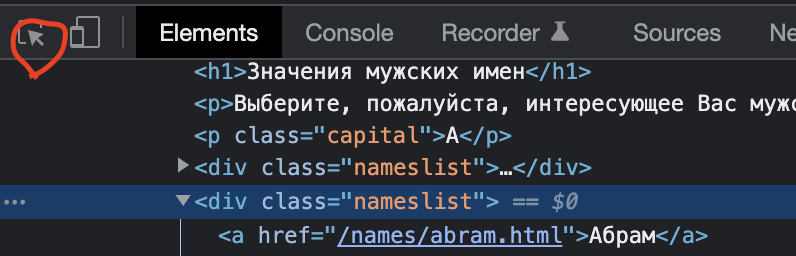 

#### Отбираю все элементы нужного класса

In [174]:
bs1 = bs.find_all(class_ = 'nameslist')

#### Создам список, чтобы положить туда уже искомые данные

In [175]:
name_list = np.array([])

In [176]:
for i in bs1:
    name_list = np.append(name_list, i.text)

#### Нужно узнать размер данных, чтобы в итоге все полученные списки привести к одному, поэтому смотрим и мотаем на ус. 

In [177]:
name_list.size

395

#### Генерирую список случайных чисел от 1 до 10

#### Моя таблица называется магазин, поэтому ass - это ассортимент

In [178]:
ass_type = np.array([i for i in np.random.randint(1, 10, 395)])

#### Генерирую не случайные id для наших данных (в моей таблице уже было 4 строки, добавленные мной при ее создании в далеком прошлом)

In [179]:
list_id = [i for i in range(309,)]

### Получаю верстку с другими данными (у меня это фамилии)

In [111]:
resp = requests.get('https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%BE%D0%B1%D1%89%D0%B5%D1%80%D1%83%D1%81%D1%81%D0%BA%D0%B8%D1%85_%D1%84%D0%B0%D0%BC%D0%B8%D0%BB%D0%B8%D0%B9')

#### Снова создаю экземпляр BS

In [112]:
bs2 = BeautifulSoup(resp.text)

#### Снова создаю пустой список

In [118]:
fam_list = np.array([])

#### Опять заполняю его значениями нужного класса

In [119]:
for i in bs2.find_all(class_ = 'dabhide'):
    fam_list = np.append(fam_list, i)

#### Проверяю размер - 304, это меньше, чем список с именами, так что уменьшим второй. 

In [181]:
fam_list.size

304

In [180]:
name_list = name_list[:304]

#### Создаю список из списков нужных мне данных

In [182]:
for i in range (304):
    values.append([list_id[i], fam_list[i], name_list[i], ass_type[i]]) 

#### Создаю подключение к моей БД
#### Создаю курсор

In [171]:
conn = psycopg2.connect(dbname='magazin', user='postgres', 
                        password='00000000', host='localhost')
cursor = conn.cursor()

#### Итерируюсь по моему списку, вставляя необходимые значения в нужном формате

In [183]:
for i in values:
    with conn.cursor() as cursor:
        conn.autocommit = True
        insert = sql.SQL('INSERT INTO ass (id, title, disc, ass_type) VALUES ({})'.format(str(i).strip('[]')))

        cursor.execute(insert)

UniqueViolation: duplicate key value violates unique constraint "ass_pkey"
DETAIL:  Key (id)=(5) already exists.
